In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
#Read csv
sales_df = pd.read_csv('Video_Games_Sales.csv')

#Clean data of any NaNs and rename columns
cleaned_sales_df = sales_df.dropna(how = 'any')
renamed_sales_df = cleaned_sales_df.rename(columns = {'Year_of_Release': 'Year of Release',
                                                     'NA_Sales': 'NA Sales',
                                                     'EU_Sales':'EU Sales',
                                                     'JP_Sales':'JP Sales',
                                                     'Other_Sales': 'Other Sales',
                                                     'Global_Sales': 'Global Sales',
                                                     'Critic_Score': 'Critic Score',
                                                     'Critic_Count': 'Critic Count',
                                                     'User_Score': 'User Score',
                                                     'User_Count': 'User Count'})

#Convert User_Score column to float
converted_series = pd.to_numeric(renamed_sales_df['User Score'])
renamed_sales_df['User Score'] = converted_series

#display preview
renamed_sales_df.head()

,Name,Platform,Year of Release,Genre,Publisher,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales,Critic Score,Critic Count,User Score,User Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


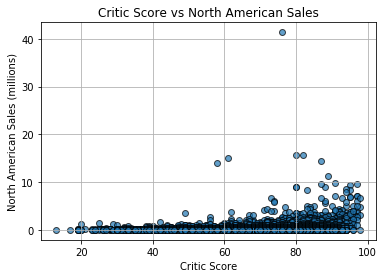

In [81]:
#Plot critic score vs NA sales
plt.scatter(renamed_sales_df['Critic Score'], renamed_sales_df['NA Sales'], edgecolors= 'black', alpha = 0.7)
plt.title("Critic Score vs North American Sales")
plt.xlabel("Critic Score")
plt.ylabel("North American Sales (millions)")
plt.grid()
plt.show()

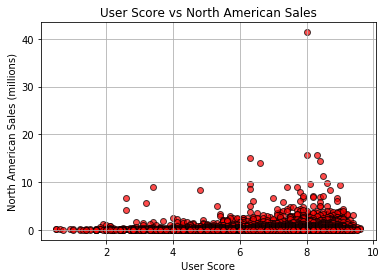

In [82]:
#Plot user score vs NA sales
plt.scatter(renamed_sales_df['User Score'], renamed_sales_df['NA Sales'], edgecolors= 'black', color = 'red', alpha = 0.7)
plt.title("User Score vs North American Sales")
plt.xlabel("User Score")
plt.ylabel("North American Sales (millions)")
plt.grid()
plt.show()

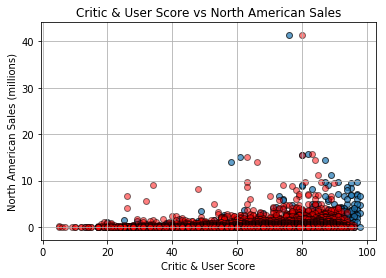

In [83]:
#Plot critic score vs NA sales
plt.scatter(renamed_sales_df['Critic Score'], renamed_sales_df['NA Sales'], edgecolors= 'black', alpha = 0.7)
plt.scatter(renamed_sales_df['User Score']*10, renamed_sales_df['NA Sales'], edgecolors= 'black',color = 'red', alpha = 0.5)
plt.title("Critic & User Score vs North American Sales")
plt.xlabel("Critic & User Score")
plt.ylabel("North American Sales (millions)")
plt.grid()
plt.show()

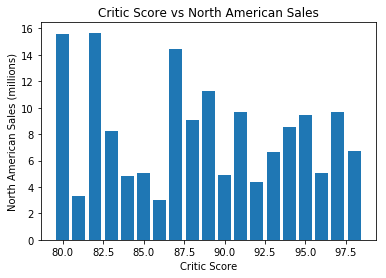

0.757174025974021

In [84]:
#Zoom into slice of data ranging from 80-100 critical score
average_80 = renamed_sales_df.loc[renamed_sales_df['Critic Score']>=80,:]
mean_sales_80 = average_80['NA Sales'].mean()
plt.bar(average_80['Critic Score'], average_80['NA Sales'])
plt.title("Critic Score vs North American Sales")
plt.xlabel("Critic Score")
plt.ylabel("North American Sales (millions)")
plt.show()

#mean of the slice
mean_sales_80

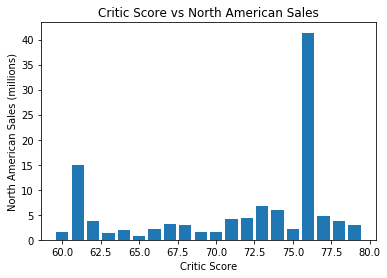

0.284092465753423

In [85]:
#Zoom into slice of data ranging from 60-79 critical score
average_60 = renamed_sales_df.loc[(renamed_sales_df['Critic Score']>=60) & (renamed_sales_df['Critic Score']<80) ,:]

mean_sales_60 = average_60['NA Sales'].mean()
plt.bar(average_60['Critic Score'], average_60['NA Sales'])
plt.title("Critic Score vs North American Sales")
plt.xlabel("Critic Score")
plt.ylabel("North American Sales (millions)")
plt.show()

#mean of the slice
mean_sales_60

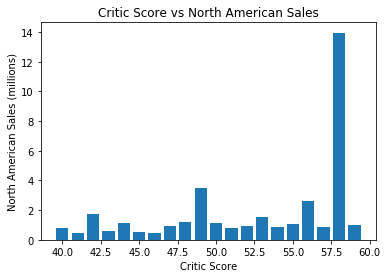

0.179564102564103

In [86]:
#Zoom into slice of data ranging from 40-59 critical score
average_40 = renamed_sales_df.loc[(renamed_sales_df['Critic Score']>=40) & (renamed_sales_df['Critic Score']<60) ,:]

mean_sales_40 = average_40['NA Sales'].mean()
plt.bar(average_40['Critic Score'], average_40['NA Sales'])
plt.title("Critic Score vs North American Sales")
plt.xlabel("Critic Score")
plt.ylabel("North American Sales (millions)")
plt.show()

#mean of the slice
mean_sales_40

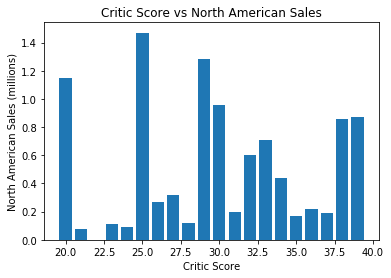

0.13169724770642197

In [87]:
#Zoom into slice of data ranging from 20-39 critical score
average_20 = renamed_sales_df.loc[(renamed_sales_df['Critic Score']>=20) & (renamed_sales_df['Critic Score']<40) ,:]

mean_sales_20 = average_20['NA Sales'].mean()
plt.bar(average_20['Critic Score'], average_20['NA Sales'])
plt.title("Critic Score vs North American Sales")
plt.xlabel("Critic Score")
plt.ylabel("North American Sales (millions)")
plt.show()

#mean of the slice
mean_sales_20

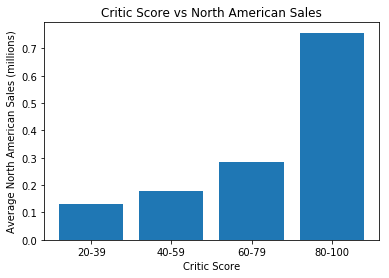

In [88]:
#plot the averages of the slices
averages = [mean_sales_20,mean_sales_40,mean_sales_60,mean_sales_80]
scores = ['20-39','40-59','60-79','80-100']
plt.title("Critic Score vs North American Sales")
plt.xlabel("Critic Score")
plt.ylabel("Average North American Sales (millions)")
plt.bar(scores,averages)
plt.show()

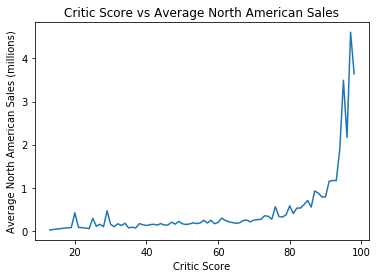

In [89]:
#Plot the total average sales vs critic score
average_critic_group = renamed_sales_df.groupby(['Critic Score'])
average_critic_na = average_critic_group['NA Sales'].mean()
new_critic_df = pd.DataFrame(average_critic_na)
average_critic_df = new_critic_df.reset_index()
plt.plot(average_critic_df['Critic Score'], average_critic_df['NA Sales'])
plt.title("Critic Score vs Average North American Sales")
plt.xlabel("Critic Score")
plt.ylabel("Average North American Sales (millions)")
plt.show()

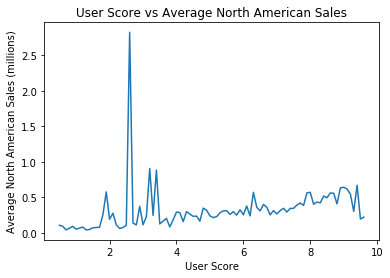

,User Score,NA Sales
18,2.6,2.8225


In [90]:
#Plot the total average sales vs user score
average_user_group = renamed_sales_df.groupby(['User Score'])
average_user_na = average_user_group['NA Sales'].mean()
new_user_df = pd.DataFrame(average_user_na)
average_user_df = new_user_df.reset_index()
plt.plot(average_user_df['User Score'], average_user_df['NA Sales'])
plt.title("User Score vs Average North American Sales")
plt.xlabel("User Score")
plt.ylabel("Average North American Sales (millions)")
plt.show()

#Find outlier value
average_user_df.loc[average_user_df['NA Sales']>2,:]

In [91]:
#Display that strange bump at 2.6 user score
renamed_sales_df.loc[renamed_sales_df['User Score']==2.6,['Name','Platform','User Score','Critic Score', 'NA Sales']]

,Name,Platform,User Score,Critic Score,NA Sales
60,Call of Duty: Ghosts,X360,2.6,73.0,6.73
69,Call of Duty: Ghosts,PS3,2.6,71.0,4.10
1828,Guitar Hero 5,PS2,2.6,71.0,0.28
7774,Spore Hero Arena,DS,2.6,49.0,0.18
